In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}


<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c
from functions import *
import warnings 
warnings.filterwarnings('ignore')

/home/john/miniconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
WDMS_pars = ([1050, 1200], 	# WDM up downs in wavelengths [m]
                [930,  1200],
                [930,1050],
                [930, 1200])

In [4]:
	WDMS_pars = ([1051.5, 1090], 	# WDM up downs in wavelengths [m]
				[1007.,  1090])


In [5]:
lams = 1095

In [6]:
spl_loss = -0 #[db]

In [7]:
lstart,lend = 780,1400
N = 2**14
fv = np.linspace(1e-3*c/lend,1e-3*c/lstart, N)
lv = 1e-3*c/fv

In [8]:
WDM_vec = [WDM(i[0], i[1],fv,c) for i in WDMS_pars]

In [9]:
def db(x):
    return 10*np.log10(x)
def perc(l):
    return 100*10**(l/10)
def Total_loss(l,spl_loss):
    return db(WDM_vec[0].il_port2(l)) + db(WDM_vec[1].il_port2(l)) + spl_loss

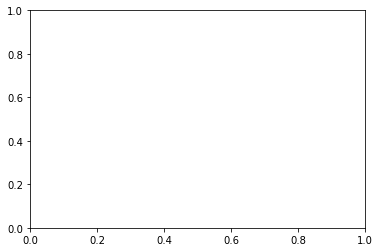

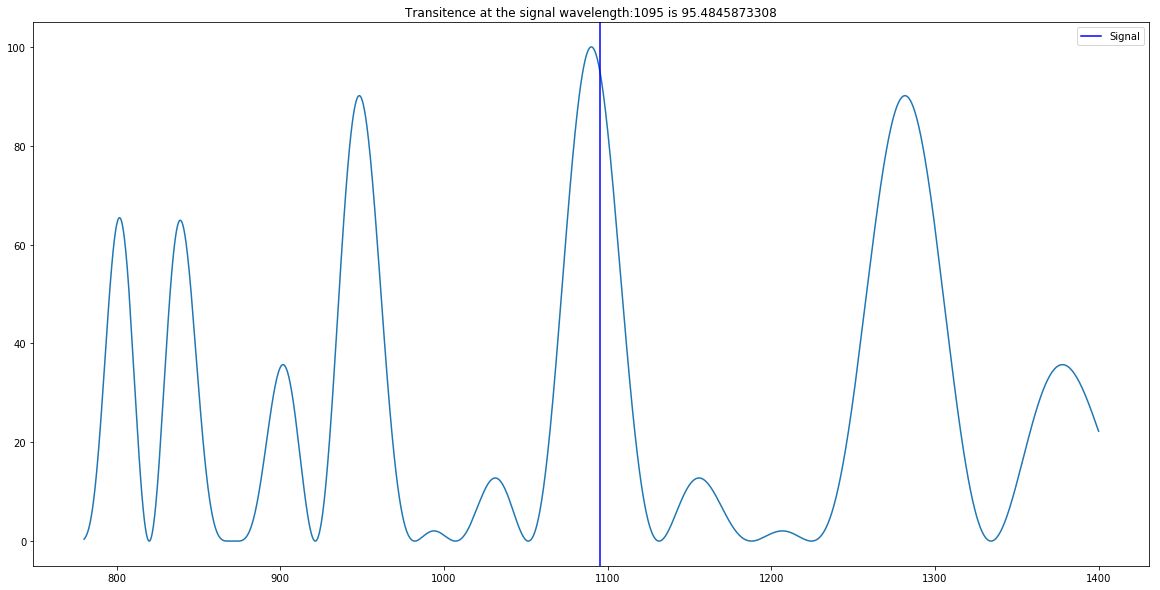

In [10]:
fig = plt.figure(figsize=(20,10))
plt.plot(lv,perc(Total_loss(lv,spl_loss)))
#plt.ylim([-60,0])
plt.axvline(lams, label = 'Signal',color='b')
plt.title("Transitence at the signal wavelength:"+str(lams)+" is "+ str(perc(Total_loss(lams,spl_loss))))
plt.legend()
plt.show()

In [11]:
for spl_loss in (-1,-1.1,-1.2,-1.3,-1.4):
    print(perc(Total_loss(lams,spl_loss)))

75.8461036979
74.119635598
72.4324667101
70.7837024747
69.1724686954


## Moving the first WDM to get the some signal in

In [12]:
spl_loss = -1   
lams_vec = np.arange(1091, 1107, 1)[:-1]

In [13]:
def Total_inserted_seed(lams_spoil,lams):
    lamp = 1051.5 
    WDM1 = WDM(lamp, lams_spoil,fv,c)
    return db(WDM1.il_port1(fv_sp = lams))

In [14]:
def Total_Trans_in_fibre(lams, lams_spoil, spl_loss):
    lamp = 1051.5
    Omega = 2*pi*c/(lamp*1e-9) - 2*pi*c/(lams*1e-9) 
    omegai = 2*pi*c/(lamp*1e-9) +Omega
    lami = 1e9*2*pi*c/(omegai)
    WDMS_pars = ([lamp,lams_spoil], 	# WDM up downs in wavelengths [m]
                [lami,  lams])
    WDM_vec = [WDM(i[0], i[1],fv,c) for i in WDMS_pars]
    return db(WDM_vec[0].il_port2(lams)) + db(WDM_vec[1].il_port2(lams)) + spl_loss

In [15]:
for lams in lams_vec:
    lams_spoil = lams + 20
    print("Transmitence of the signal "+ str(lams)+" in the FOPO is :", str(perc(Total_Trans_in_fibre(lams,lams_spoil,spl_loss)))+', With '
         +str(perc(Total_inserted_seed(lams_spoil,lams)))+ ' of signal inserted')

Transmitence of the signal 1091 in the FOPO is : 60.5782222936, With 23.7365365533 of signal inserted
Transmitence of the signal 1092 in the FOPO is : 61.174423893, With 22.9859632092 of signal inserted
Transmitence of the signal 1093 in the FOPO is : 61.7447578266, With 22.267955327 of signal inserted
Transmitence of the signal 1094 in the FOPO is : 62.2906109948, With 21.5807669025 of signal inserted
Transmitence of the signal 1095 in the FOPO is : 62.8132854115, With 20.9227587971 of signal inserted
Transmitence of the signal 1096 in the FOPO is : 63.3140036469, With 20.2923918865 of signal inserted
Transmitence of the signal 1097 in the FOPO is : 63.7939139613, With 19.6882205964 of signal inserted
Transmitence of the signal 1098 in the FOPO is : 64.2540951362, With 19.1088868212 of signal inserted
Transmitence of the signal 1099 in the FOPO is : 64.6955610087, With 18.5531142158 of signal inserted
Transmitence of the signal 1100 in the FOPO is : 65.119264719, With 18.0197028479 of

In [16]:
spoil = 0
T = [perc(Total_Trans_in_fibre(lams,lams+spoil,spl_loss)) for lams in lams_vec]
Insertion = [perc(Total_inserted_seed(lams+spoil ,lams)) for lams in lams_vec]

In [21]:
lams_vec

array([1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101,
       1102, 1103, 1104, 1105])

In [32]:
spoil_vec = np.arange(-28,42,0.2)
lams_vec = 1095
spl_loss = -1
insertion,T = [],[]
for spoil in spoil_vec:
    T.append(perc(Total_Trans_in_fibre(lams,lams+spoil,spl_loss)))
    insertion.append(perc(Total_inserted_seed(lams+spoil ,lams)) )

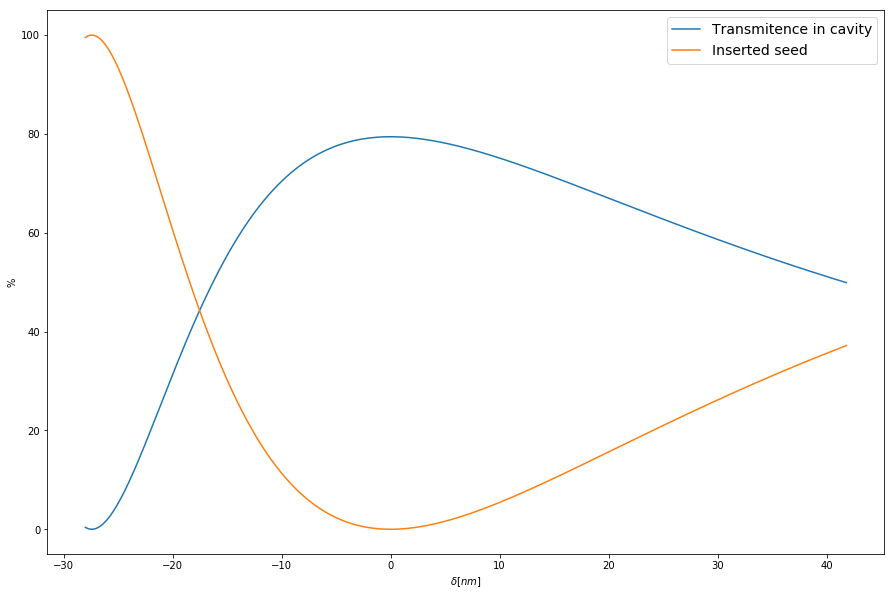

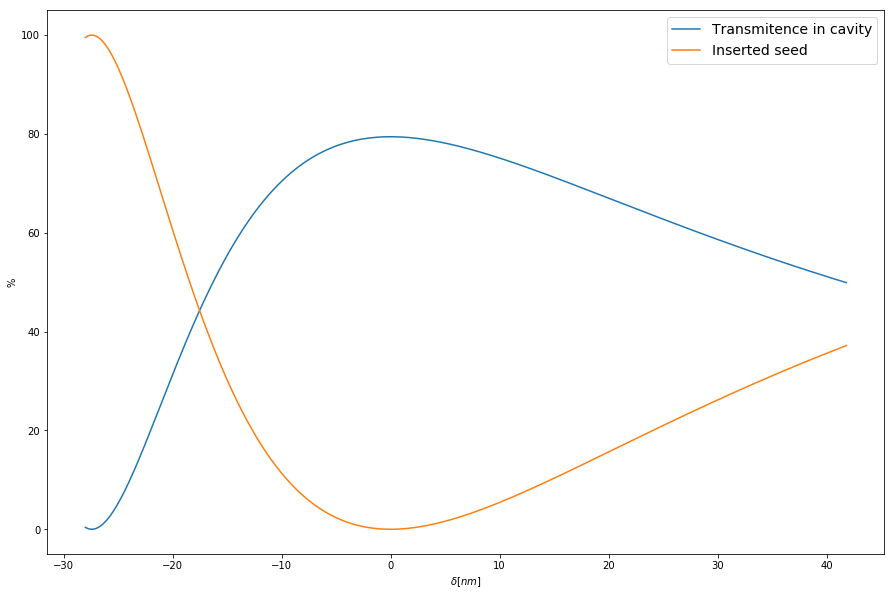

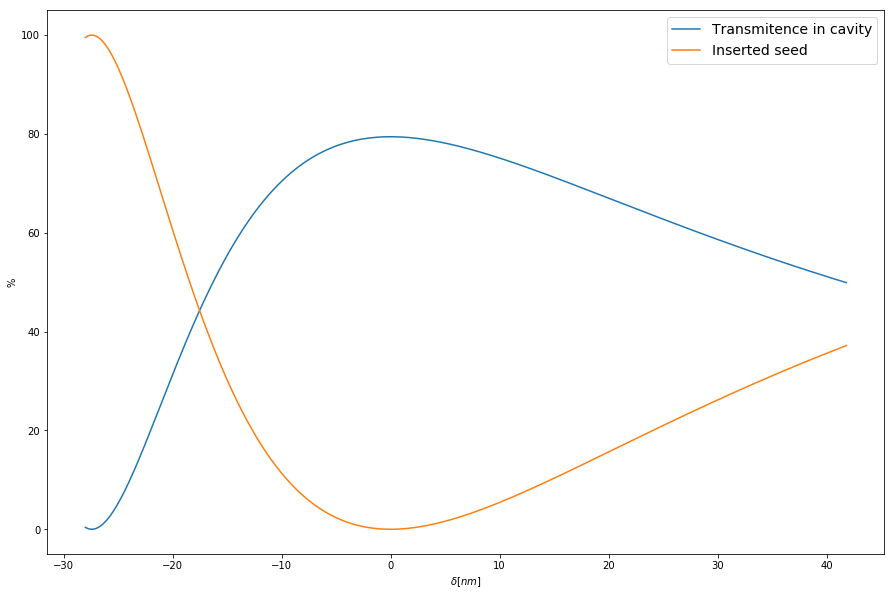

In [39]:
import pickle as pl
fig = plt.figure(figsize=(15,10))
plt.plot(spoil_vec, T, label = 'Transmitence in cavity')
plt.plot(spoil_vec,insertion, label = 'Inserted seed')
plt.xlabel(r'$\delta [nm]$')
plt.ylabel(r'%')
plt.legend(fontsize = 14)
plt.savefig('inserted_transmited.png')
data = (spoil_vec, T, insertion)
with open('inserted_transmited.pickle','wb') as f:
    pl.dump((fig,data),f)
plt.show()

In [34]:
for i in (10e-3, 100e-3,1):
    print(0.1565*i, 23.7365365533*0.01*i)

0.001565 0.00237365365533
0.01565 0.023736536553300002
0.1565 0.237365365533


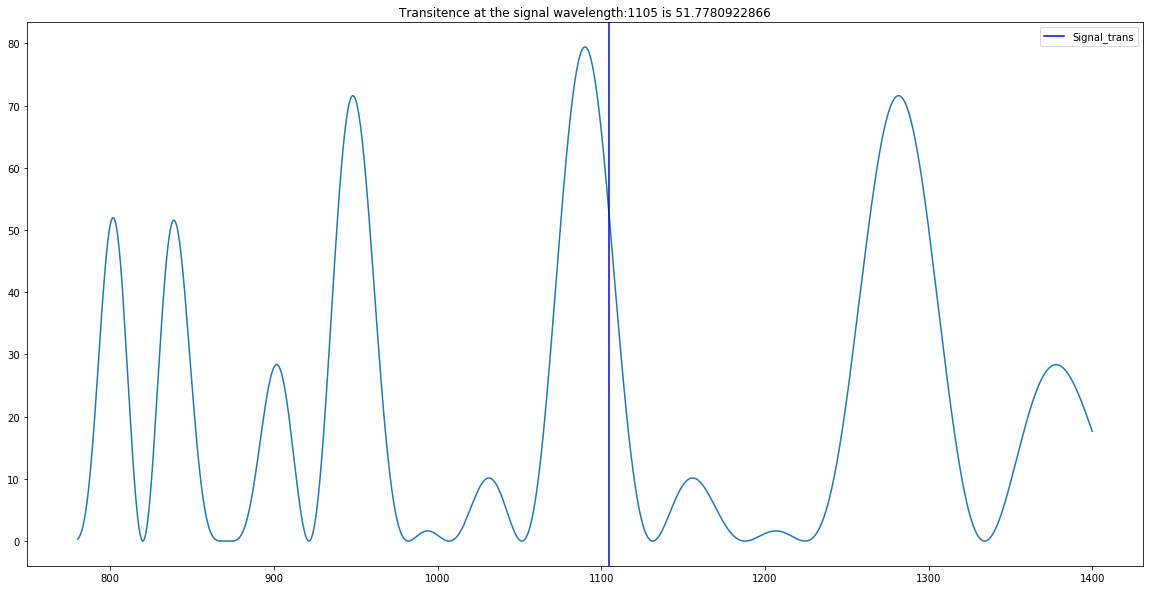

In [20]:
fig = plt.figure(figsize=(20,10))
plt.plot(lv,perc(Total_loss(lv,spl_loss)))
#plt.ylim([-60,0])
plt.axvline(lams, label = 'Signal_trans',color='b')
plt.title("Transitence at the signal wavelength:"+str(lams)+" is "+ str(perc(Total_loss(lams,spl_loss))))
plt.legend()
plt.savefig('../12517/Trans.png')
plt.show()